In [30]:
from __future__ import division
%pylab  --no-import-all
%matplotlib inline
import pandas as pd
import numpy as np

Using matplotlib backend: inline
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [32]:
countries = pd.Series(['Colombia', 'Turkey', 'USA', 'Germany', 'Chile'], name='country')
print(countries)
print('\n', 'There are ', countries.shape[0], 'countries in this series.')

0    Colombia
1      Turkey
2         USA
3     Germany
4       Chile
Name: country, dtype: object

 There are  5 countries in this series.


In [34]:
np.random.seed(123456)
data = pd.Series(np.random.normal(size=(countries.shape)), name='noise')
print(data)
print('\n', 'The average in this sample is ', data.mean())

0    0.469112
1   -0.282863
2   -1.509059
3   -1.135632
4    1.212112
Name: noise, dtype: float64

 The average in this sample is  -0.24926597871826645


In [36]:
df = pd.DataFrame([countries, data])
df

,0,1,2,3,4
country,Colombia,Turkey,USA,Germany,Chile
noise,0.469112,-0.282863,-1.509059,-1.135632,1.212112


In [38]:
df = df.T
df

,country,noise
0,Colombia,0.469112
1,Turkey,-0.282863
2,USA,-1.509059
3,Germany,-1.135632
4,Chile,1.212112


In [40]:
df['noise_sq'] = df.noise**2
df['noise and its square'] = df.noise + df.noise_sq
df['name length'] = df.country.apply(len)
df

,country,noise,noise_sq,noise and its square,name length
0,Colombia,0.469112,0.220066,0.689179,8
1,Turkey,-0.282863,0.080012,-0.202852,6
2,USA,-1.509059,2.277258,0.768199,3
3,Germany,-1.135632,1.289661,0.154029,7
4,Chile,1.212112,1.469216,2.681328,5


In [42]:
# Let's create a list of South American countries
south_america = ['Colombia', 'Chile']
# Select the rows for South American countries
df.loc[df.country.apply(lambda x: x in south_america)]


,country,noise,noise_sq,noise and its square,name length
0,Colombia,0.469112,0.220066,0.689179,8
4,Chile,1.212112,1.469216,2.681328,5


In [44]:
df.country.apply(lambda x: x in south_america)

0     True
1    False
2    False
3    False
4     True
Name: country, dtype: bool

In [46]:
df['South America'] = df.country.apply(lambda x: x in south_america).astype(int)

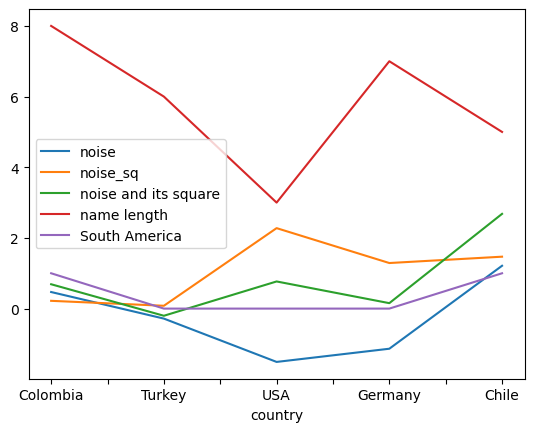

In [63]:
df.plot()
plt.show(1)

In [50]:
df = df.set_index('country')
print(df)
df.plot()

             noise  noise_sq noise and its square  name length  South America
country                                                                      
Colombia  0.469112  0.220066             0.689179            8              1
Turkey   -0.282863  0.080012            -0.202852            6              0
USA      -1.509059  2.277258             0.768199            3              0
Germany  -1.135632  1.289661             0.154029            7              0
Chile     1.212112  1.469216             2.681328            5              1


<Axes: xlabel='country'>

In [52]:
df.loc['Colombia']

noise                   0.469112
noise_sq                0.220066
noise and its square    0.689179
name length                    8
South America                  1
Name: Colombia, dtype: object